In [1]:
from ego_solver import EGO
import numpy as np
from matplotlib import colors, ticker, cm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import time
%matplotlib notebook
pal = sns.color_palette('Dark2', n_colors=2, desat=.6)
sns.set_palette(pal)
sns.set_context(context='paper', font_scale=1.5)
sns.set_style('ticks')

In [2]:
obj_name='branin'
file_address = 'OPT10_solution_obj_name_'+obj_name+'_maxiter_100_repeat_30.pkl'
with open(file_address, 'rb') as f:
    dat = pickle.load(f)
# for i in dat['solution'][:][0]:
#     print i[0].shape, i[1].shape
solution =  dat['solution']  
solution[29][0][0]

array([[  6.90235185,   5.90307289],
       [  8.61046606,   4.06262702],
       [  8.42811727,  14.0881928 ],
       [  1.8202777 ,   8.0286964 ],
       [ -4.66050639,   0.7310039 ],
       [ -3.21073107,   7.34338924],
       [  5.20965453,   9.06402139],
       [ -0.45915574,  12.26878591],
       [ -1.08336135,  10.6245678 ],
       [  3.0031815 ,   2.67758457],
       [  5.83602475,   2.28996083],
       [  3.75064685,   3.93015292],
       [ 10.        ,   0.5896065 ],
       [  8.7031965 ,   1.97786936],
       [ 10.        ,   2.48435215],
       [  8.05758521,   0.18620748],
       [  9.03309567,   2.84704911],
       [  9.55048161,   1.63783625],
       [  3.83174213,   2.83924342],
       [  7.89429621,   2.67352489],
       [  8.94069546,   1.08421672],
       [  9.3830891 ,   2.24547237],
       [  3.19123732,   3.25607479],
       [  9.80042297,   3.29049126],
       [  9.10880801,   1.64594788],
       [  9.99999997,   1.8056079 ],
       [  8.19254378,   1.31949653],
 

(30L, 1L, 2L)
(2954L, 2L)


<IPython.core.display.Javascript object>


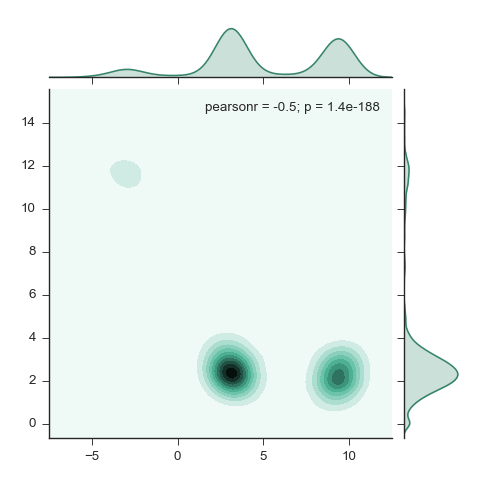

<IPython.core.display.Javascript object>


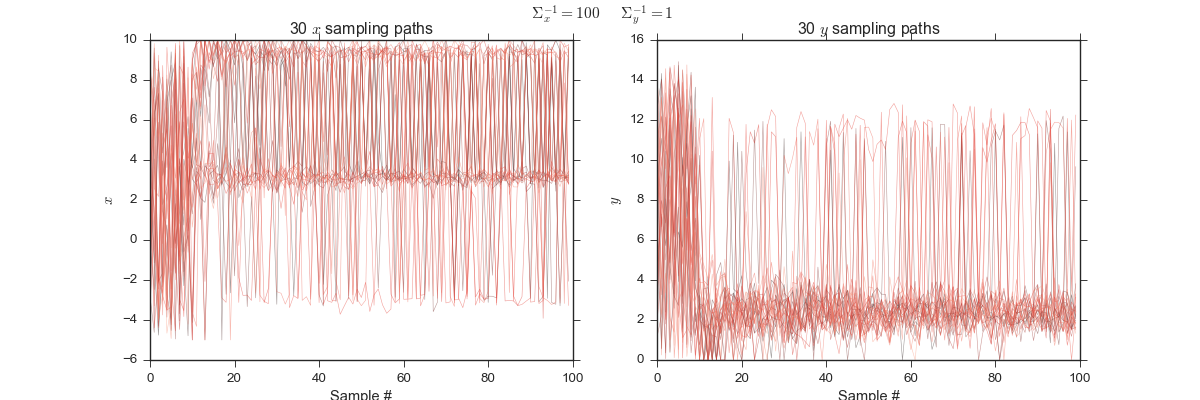

In [3]:
# file_address = 'solution_obj_name_rosenbrock-6dim_maxiter_100_repeat_30.pkl'
with open(file_address, 'r') as f: 
    dat = pickle.load(f)


    
solution = np.array(dat['solution'])
print solution.shape
X =np.copy(solution[0,0,0])
for i in range(1,30):
    X = np.vstack((X,solution[i,0,0]))
print X.shape

sns.jointplot(X[:,0],X[:,1], kind='kde')
plt.suptitle(r'Sampling Distribution for $\Sigma^{-1}_x=100$', y=1.05, fontsize=13)

# plt.plot(solution[0,0,0])
def hairplot(solution,sig):
    
    with sns.color_palette('Reds_d', n_colors=30):
        fig,ax=plt.subplots(ncols=2, figsize=(15,5))
        for i in range(1,30):
            ax[0].plot(solution[i,0,0][:,0], lw=0.5, alpha=.5)
            ax[1].plot(solution[i,0,0][:,1], lw=0.5, alpha=.5)
        ax[0].set_title('30 $x$ sampling paths')
        ax[1].set_title('30 $y$ sampling paths')
        fig.suptitle('BO Sample paths for $f(x)=x^2+y^2$\n $\Sigma^{-1}_x='+str(sig)+'$'+\
                     '\t $\Sigma^{-1}_y=1$',
                     fontsize=14, y=1.05)
        ax[0].set_ylabel('$x$')
        ax[0].set_xlabel('Sample #')
        ax[1].set_ylabel('$y$')
        ax[1].set_xlabel('Sample #')
hairplot(solution,100)

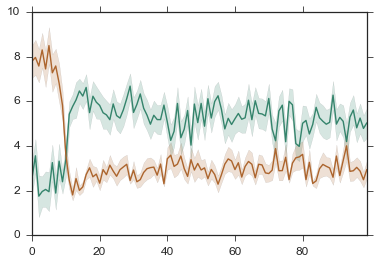

In [4]:
%matplotlib inline
timesx = np.zeros((30,100))
timesy = np.zeros((30,100))
for i in range(30):
    pathx = solution[i,0,0][:,0]
    pathy = solution[i,0,0][:,1]
    
    timesx[i, :pathx.size] = pathx
    timesx[i, pathx.size:] = np.ones(100-pathx.size)*pathx[-1]
    
    timesy[i, :pathy.size] = pathy
    timesy[i, pathy.size:] = np.ones(100-pathy.size)*pathy[-1]
    
sns.tsplot(timesx, err_style=['ci_band'], color=pal[0])
sns.tsplot(timesy, err_style=['ci_band'], color=pal[1])
# sns.tsplot(times, ci=[68,99.7])

69.9209 874.308333333
65.9790666667 822.861666667
59.5146333333 1221.97366667
49.5828333333 7068.80666667


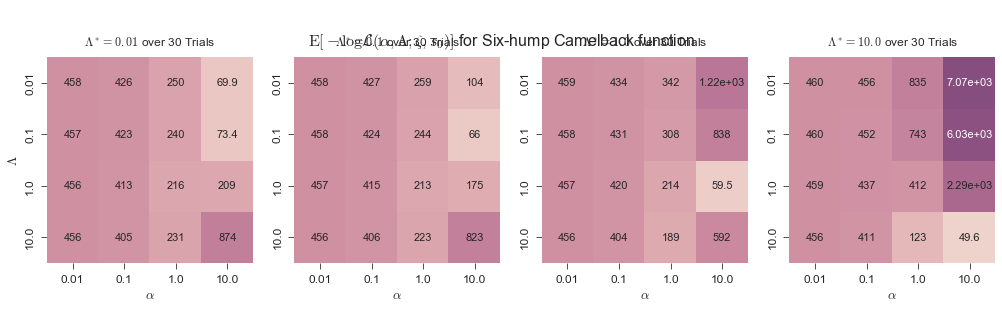

In [5]:
sig_scale = np.array([0.01, 0.1, 1., 10.])
alpha_set = np.array([0.01, 0.1, 1., 10.])
# alpha_set = np.array([1e-5, 1e-4, 1e-3, 1e-2])

# data = np.loadtxt('all_10_trials_branin.txt').reshape((30,4,4))

c_m = sns.cubehelix_palette(as_cmap=True, light=1)

norm = colors.LogNorm(vmin=10., vmax=1e5)
s_m = cm.ScalarMappable(cmap=c_m, norm=norm)
#     norm.autoscale(X)
s_m.set_array([])


import matplotlib.colors as colors
import matplotlib.cm

def heat_plot(data, sig, ax=None):
    if ax is None:
        f, ax = plt.subplots( figsize=(12,4))
    X = -data.mean(axis=0)
    print np.min(X), np.max(X)
    
    
    
    hmap = sns.heatmap(X,
                xticklabels=alpha_set, yticklabels=sig_scale, cmap=c_m, 
               robust=False, annot=True, ax=ax, square=True, cbar=False,
                annot_kws={"size": 11}, fmt='.3g', norm=norm, vmin=10., vmax=1e5)
    ax.set_xlabel(r'$\alpha$')
    
#     ax[0].set_title(r'$\mathrm{E}[-\log {\cal L}(\Sigma^{-1}_{test}|\Sigma^{-1},\alpha)]$')

#     for y in range(data.mean(axis=0).shape[0]):
#         for x in range(data.mean(axis=0).shape[1]):
#             ax.text(x + 0.5, y + 0.2, '[ {:.1e} ]'.format( data.std(axis=0)[-y-1, x]),
#                      horizontalalignment='center',
#                      verticalalignment='center', color='gray'
#                      )
    
    # f.suptitle('BO Paramter estimation for Branin \n True $\Sigma^{-1}=0.01$ over 30 Trials', 
    #            y=1.1, fontsize=12)
    ax.set_title('$\Lambda^*='+str(sig)+'$ over 30 Trials', 
               y=1.03, fontsize=12)
# cbar_ax = f.axes[-1]
# cbar_ax.set_ylabel('-log likelihood')
# plt.showw()
names=['0.01','0.1','1.0','10.0']





f,ax = plt.subplots(ncols=4, figsize=(17,6))
for n,i in enumerate(names):
    data = np.loadtxt('all_'+i+'_trials_sixmin.txt').reshape((30,4,4))
    heat_plot(data, sig_scale[n], ax=ax[n])
title=r'$\mathrm{E}[-\log {\cal L}(\alpha,\Lambda;\zeta,s_0)]$'+\
               ' for Six-hump Camelback function'

f.get_axes()[0].annotate(title, (0.5, 0.85), 
                            xycoords='figure fraction', ha='center', 
                            fontsize=16
                            )
f.get_axes()[0].set_ylabel(r'$\Lambda$')
# f.colorbar(s_m, orientation='horizontal', ax = f.get_axes(), fraction=0.075)

plt.subplots_adjust(top=0.8, bottom=.26)
plt.subplots_adjust()
# plt.tight_layout()
# f.colorbar()

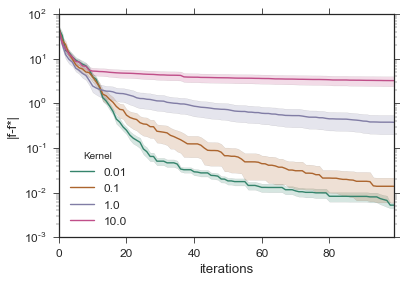

In [6]:
file_address = 'solution_obj_name_branin_maxiter_100_repeat_30.pkl'
with open(file_address, 'r') as f:
    dat = pickle.load(f)

solution = dat['solution']

def convergence_plot(solution, true, ax=None):

    sig001=pd.DataFrame()
    sig01=pd.DataFrame()
    sig1=pd.DataFrame()
    sig10=pd.DataFrame()
    sigs = [sig001, sig01, sig1, sig10]


    all_kernels = pd.DataFrame()


    with sns.color_palette('Dark2', n_colors=4, desat=.6):
    # norm = colors.LogNorm(vmin=0.01, vmax=10.0)

    # c_m = sns.cubehelix_palette(as_cmap=True)
    # s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
    # s_m.set_array([])
        
        if ax is None:
            f, ax = plt.subplots( figsize=(6,4))
        
        timesf = np.zeros((30,100))
        for n, sig in enumerate(sigs):
            sig['iterations']=range(100)
            for i in range(30):
                pathf = solution[i][n][1]

                timesf[i, :pathf.size] = pathf
                timesf[i, pathf.size:] = np.ones(100-pathf.size)*pathf[-1]
    #             print timesf.shape
                sigs[n]['Trial'+str(i)]=np.minimum.accumulate(timesf[i])
            sig = pd.melt(sig, id_vars=['iterations'], value_name='f')
    #         print 'hi!'
            sig['Kernel']=sig_scale[n]
    #         print sig
            all_kernels = pd.concat([all_kernels, sig])
        all_kernels['|f-f*|'] = np.abs(all_kernels['f'] - true)
        sns.tsplot(all_kernels, time='iterations', unit='variable', value='|f-f*|', condition='Kernel',
                   ci=[68], err_style=['ci_band'], ax=ax) 
    # sns.tsplot(np.minimum.accumulate(timesf, axis=1), 
    #            err_style=['ci_band'], ax=plt.gca())
        ax.set_yscale('log')
# sns.tsplot(timesy, err_style=['ci_band'], color=pal[1])
# sns.tsplot(times, ci=[68,99.7])
convergence_plot(solution, 0.397887)

In [7]:
file_address = 'OPT_solution_obj_name_rosenbrock-30dim_maxiter_50_repeat_30.pkl'
with open(file_address, 'r') as f:
    dat = pickle.load(f)

solution = dat['solution']

def convergence_df(solution, true, time, ax=None):

    sig001=pd.DataFrame()
    sig01=pd.DataFrame()
    sig1=pd.DataFrame()
    sig10=pd.DataFrame()
    sigs = [sig001, sig01, sig1, sig10]


    all_kernels = pd.DataFrame()
    
    timesf = np.zeros((30,time))
    for n, sig in enumerate(sigs):
        sig['iterations']=range(time)
        for i in range(30):
            pathf = solution[i][n][1]

            timesf[i, :pathf.size] = pathf
            timesf[i, pathf.size:] = np.ones(time-pathf.size)*pathf[-1]
#             print timesf.shape
            sigs[n]['Trial'+str(i)]=np.minimum.accumulate(timesf[i])
        sig = pd.melt(sig, id_vars=['iterations'], value_name='f')
#         print 'hi!'
        sig['Kernel']=sig_scale[n]
#         print sig
        all_kernels = pd.concat([all_kernels, sig])
    all_kernels['|f-f*|'] = np.abs(all_kernels['f'] - true)
    return all_kernels

convergence_df(solution, 0.0, 50).head()

,iterations,variable,f,Kernel,|f-f*|
0,0,Trial0,5700.65347,0.01,5700.65347
1,1,Trial0,5700.65347,0.01,5700.65347
2,2,Trial0,5700.65347,0.01,5700.65347
3,3,Trial0,5700.65347,0.01,5700.65347
4,4,Trial0,5700.65347,0.01,5700.65347


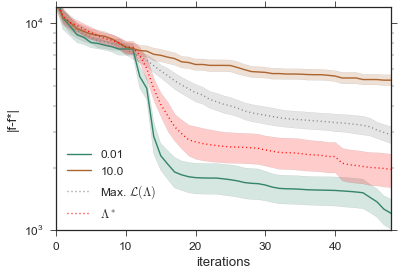

In [73]:
# sns.tsplot(all_kernels, time='iterations', unit='variable', value='|f-f*|', condition='Kernel',
#                    ci=[68], err_style=['ci_band'], ax=ax) 


file_address = 'OPT_solution_obj_name_rosenbrock-30dim_maxiter_50_repeat_30 (2).pkl'
with open(file_address, 'r') as f:
    dat_opt = pickle.load(f)
file_address = 'solution_obj_name_rosenbrock-30dim_maxiter_100_repeat_30.pkl'
with open(file_address, 'r') as f:
    dat = pickle.load(f)
file_address = 'IRL_solution_obj_name_rosenbrock-30dim_maxiter_49_repeat_30.pkl'
with open(file_address, 'r') as f:
    dat_irl = pickle.load(f)
    
opt_kern = convergence_df(dat_opt['solution'], 0.0, 50)
kern = convergence_df(dat['solution'], 0.0, 100)
irl_kern = convergence_df(dat_irl['solution'], 0.0, 49)

sns.tsplot(kern[kern['Kernel'].isin([0.01, 10.])], time='iterations', unit='variable', value='|f-f*|', 
           condition='Kernel', ci=[95], err_style=['ci_band']) 
sns.tsplot(opt_kern[opt_kern['Kernel'].isin([10.])], time='iterations', unit='variable', value='|f-f*|', 
           condition='Kernel', ci=[95], err_style=['ci_band'], color='gray', linestyle=':') 
sns.tsplot(irl_kern[irl_kern['Kernel'].isin([10.])], time='iterations', unit='variable', value='|f-f*|', 
           condition='Kernel', ci=[95], err_style=['ci_band'], color='red', linestyle=':') 
L=plt.legend(loc=0)
L.get_texts()[2].set_text('Max. $\mathcal{L}(\Lambda)$')
L.get_texts()[3].set_text('$\Lambda^*$')
plt.ylim(1000,12000)
plt.yscale('log')

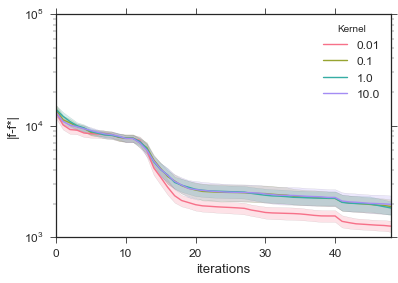

In [9]:
sns.tsplot(irl_kern, time='iterations', unit='variable', value='|f-f*|', condition='Kernel',
                   ci=[95], err_style=['ci_band']) 
plt.yscale('log')

In [11]:
dat=[[10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.01, 0.01, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.01, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 1.0, 0.10000000000000001, 0.01, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.01, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 1.0, 1.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 1.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01], [10.0, 10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 10.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [10.0, 1.0, 0.10000000000000001, 0.01, 1.0, 1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.01, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [1.0, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]

In [69]:
print len(dat)
print len(dat[0])
# np.array(dat)
counts = np.zeros((4,40))
for i in dat[:]:
#     print len(i)
    for n,j in enumerate(i):
        if abs(j-0.01)<= 1e-4:
            counts[0,n]+=1
        elif abs(j-0.1)<= 1e-4:
            counts[1,n]+=1
        elif abs(j-1.)<= 1e-4:
            counts[2,n]+=1
        else:
            counts[3,n]+=1
counts.shape
#     plt.plot(range(len(i)), i)
# plt.yscale('log')

120
40


(4L, 40L)

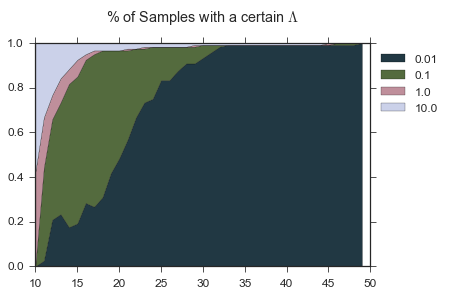

In [71]:
# from sklearn.preprocessing import StandardScaler
# # scale=
# per_counts = StandardScaler().fit_transform(counts)
# per_counts
pal4 = sns.color_palette('cubehelix', n_colors=4, desat=.6)
with sns.color_palette(pal4):
    plt.stackplot(range(10,50),counts/counts.sum(axis=0))
#     plt.yscale('log')
    plt.legend(['0.01', '0.1', '1.0', '10.0'], loc="upper left", bbox_to_anchor=(1,1))
    plt.title('% of Samples with a certain $\Lambda$\n')
    plt.ylim(0,1)
    

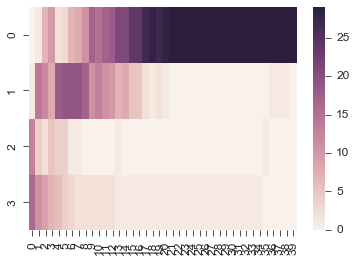

In [57]:
sns.heatmap(counts)